In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
import joblib
from sklearn import metrics

In [5]:
data = pd.read_csv('diabetes.csv')
data.shape

(768, 9)

In [6]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Exploratory data analysis

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
#chevk for any null values
data.isnull().values.any()

False

In [33]:
#To know more about the dataset
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [32]:
#To know more about the dataset with transpose – here T is for the transpose
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [34]:
# check that if our dataset have null values or not
data.isnull().head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [35]:
#check how many null values our data has
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# data visualization

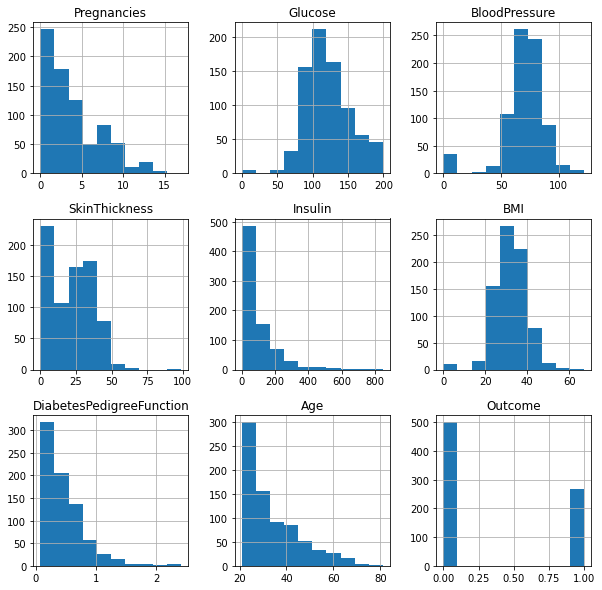

In [67]:
#plotting the data distribution plots before removing null values
p = data.hist(figsize = (10,10))

In [38]:
data['Glucose'].fillna(data['Glucose'].mean(), inplace = True)
data['BloodPressure'].fillna(data['BloodPressure'].mean(), inplace = True)
data['SkinThickness'].fillna(data['SkinThickness'].median(), inplace = True)
data['Insulin'].fillna(data['Insulin'].median(), inplace = True)
data['BMI'].fillna(data['BMI'].median(), inplace = True)

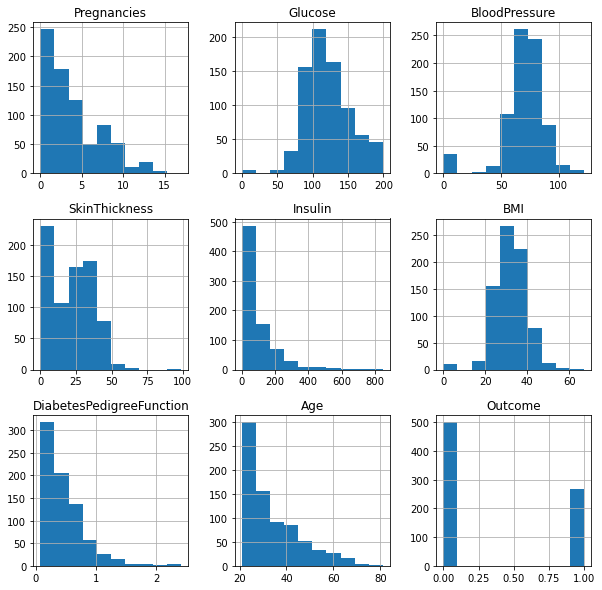

In [68]:
#plotting the data after removing null values
p = data.hist(figsize = (10,10))

0    500
1    268
Name: Outcome, dtype: int64


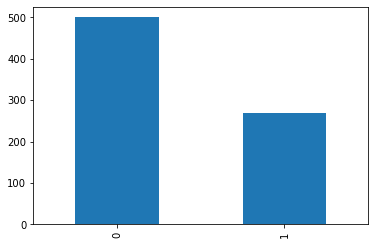

In [43]:
#check that how well our outcome column is balanced
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = data["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(data.Outcome.value_counts())
p=data.Outcome.value_counts().plot(kind="bar")

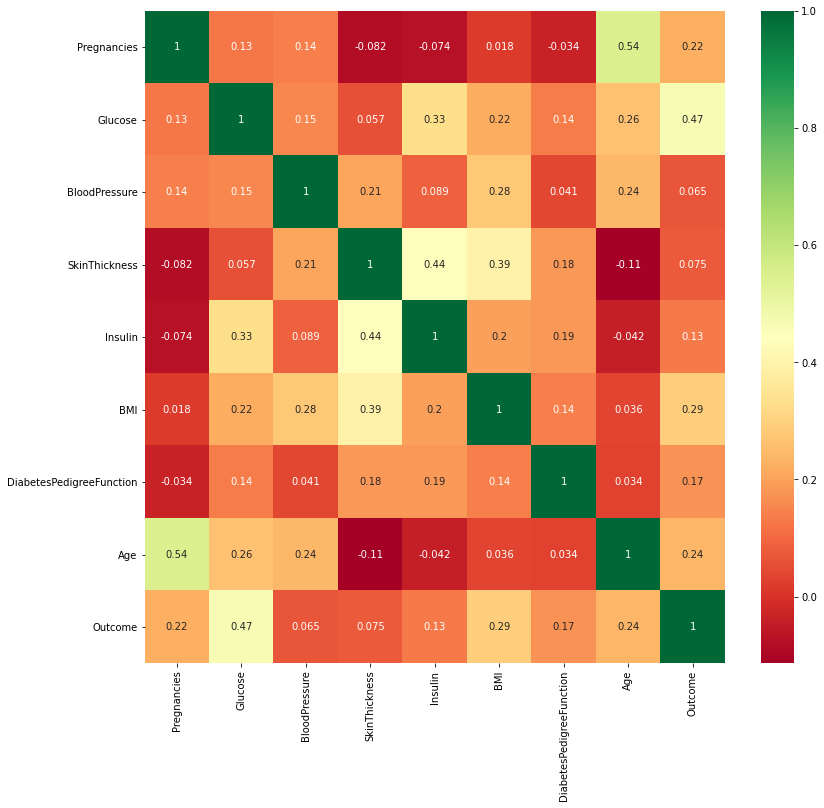

In [10]:
#correlation
#getting correlations of each feature in the dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (13,12))
#ploting heatmap
g = sns.heatmap(data[top_corr_features].corr(),annot=True,cmap='RdYlGn')


In [11]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [45]:
#Before scaling down the data let’s have a look into it
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [48]:
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(data.drop(["Outcome"],axis = 1),), columns=['Pregnancies', 
'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


# Model building

In [49]:
diabetes_true_count = len(data.loc[data['Outcome'] == 1])
diabetes_false_count = len(data.loc[data['Outcome'] == 0])
(diabetes_true_count,diabetes_false_count)

(268, 500)

In [50]:
#train test split data
from sklearn.model_selection import train_test_split
feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
predicted_class =  ['Outcome']


In [51]:
X = data[feature_columns].values
y = data[predicted_class].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

In [52]:
#checking how many other missing values(zeores) in each feature column
print('total num of rows: {0}'.format(len(data)))
print('num of rows missing in Pregnencies : {0}'.format(len(data.loc[data['Pregnancies']==0])))
print('num of rows missing in Glucose : {0}'.format(len(data.loc[data['Glucose']==0])))
print('num of rows missing in BloodPressure : {0}'.format(len(data.loc[data['BloodPressure']==0])))
print('num of rows missing in SkinThickness : {0}'.format(len(data.loc[data['SkinThickness']==0])))
print('num of rows missing in Insulin : {0}'.format(len(data.loc[data['Insulin']==0])))
print('num of rows missing in BMI : {0}'.format(len(data.loc[data['BMI']==0])))
print('num of rows missing in DiabetesPedigreeFunction : {0}'.format(len(data.loc[data['DiabetesPedigreeFunction']==0])))
print('num of rows missing in Age : {0}'.format(len(data.loc[data['Age']==0])))

total num of rows: 768
num of rows missing in Pregnencies : 111
num of rows missing in Glucose : 5
num of rows missing in BloodPressure : 35
num of rows missing in SkinThickness : 227
num of rows missing in Insulin : 374
num of rows missing in BMI : 11
num of rows missing in DiabetesPedigreeFunction : 0
num of rows missing in Age : 0


In [53]:
from sklearn.impute import SimpleImputer
fill_values = SimpleImputer(missing_values=0, strategy = 'mean')
X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)



In [54]:
#applying random forest algorithm
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state = 10)
random_forest_model.fit(X_train, y_train.ravel())

RandomForestClassifier(random_state=10)

In [55]:
predict_train_data = random_forest_model.predict(X_test)
from sklearn import metrics
print('Random Forest Accuracy = {0:.3f}'.format(metrics.accuracy_score(y_test, predict_train_data)))

Random Forest Accuracy = 0.766


In [56]:
#applying decision tree classifier
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [57]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[117  27]
 [ 38  49]]
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       144
           1       0.64      0.56      0.60        87

    accuracy                           0.72       231
   macro avg       0.70      0.69      0.69       231
weighted avg       0.71      0.72      0.71       231



In [58]:
from sklearn import metrics

predictions = dtree.predict(X_test)
print(" Desicion Tree Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)))

 Desicion Tree Accuracy Score = 0.70995670995671


In [59]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[116  28]
 [ 39  48]]
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       144
           1       0.63      0.55      0.59        87

    accuracy                           0.71       231
   macro avg       0.69      0.68      0.68       231
weighted avg       0.70      0.71      0.71       231



In [60]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)

C:\Users\poorn\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC()

In [61]:
svc_pred = svc_model.predict(X_test)

In [62]:
from sklearn import metrics

print(" SVC Accuracy Score =", format(metrics.accuracy_score(y_test, svc_pred)))

 SVC Accuracy Score = 0.7056277056277056


In [63]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test,svc_pred))

[[128  16]
 [ 52  35]]
              precision    recall  f1-score   support

           0       0.71      0.89      0.79       144
           1       0.69      0.40      0.51        87

    accuracy                           0.71       231
   macro avg       0.70      0.65      0.65       231
weighted avg       0.70      0.71      0.68       231



In [64]:
import pickle

saved_model = pickle.dumps(random_forest_model)


rfc_from_pickle = pickle.loads(saved_model)


rfc_from_pickle.predict(X_test)

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0], dtype=int64)

In [65]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [66]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0
